In [2]:
%matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
import matplotlib.patches as mpatches

import pandas as pd

## import database using pandas
massShooting = pd.read_csv('data/GV_database.csv')


<IPython.core.display.Javascript object>


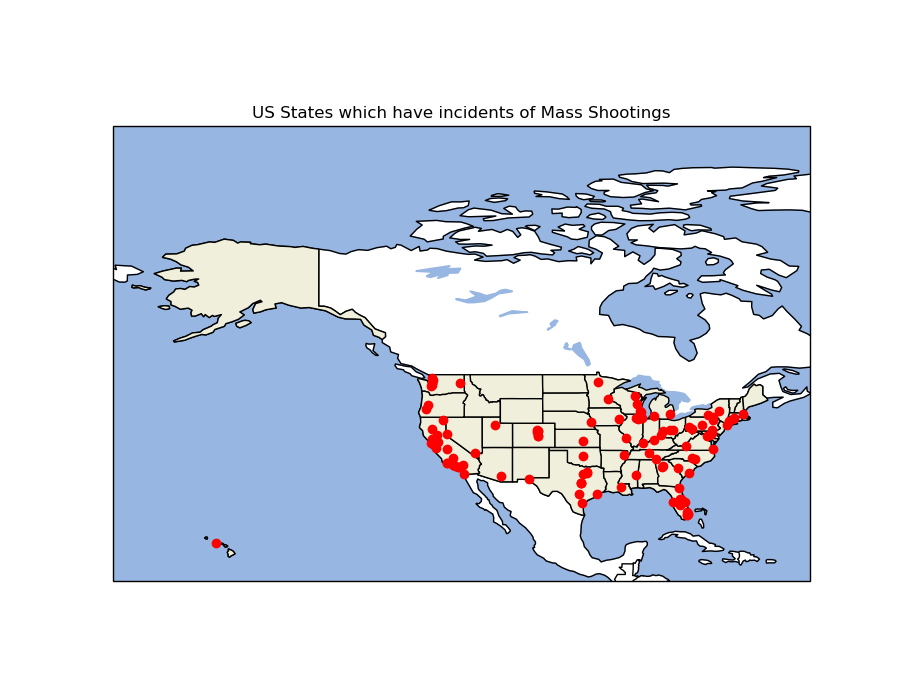

In [11]:
## make a map of all the mass shooting incidents
lon = massShooting['longitude']
lat = massShooting['latitude']

## make the figure
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1, 1, 1,
                     projection=ccrs.PlateCarree())

### plots features on the map (the ocean, major lakes, and black boarders etc..)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)

## the line below focuses the map on North America, to modify see note below
## NOTE: extent[start long, end long, start lat, end lat] based on location of USA 
ax.set_extent([-175, -60, 15, 90])

## makes a function that will colour the geometry that is passed into it -> the us states in this example
def colorize_state(geometry):
        facecolor = (0.9375, 0.9375, 0.859375)
        return {'facecolor': facecolor, 'edgecolor': 'black'}

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
ax.add_geometries(
        shpreader.Reader(states_shp).geometries(),
        ccrs.PlateCarree(),styler=colorize_state, zorder=1)
    
## plot the points for each mass shooting on top of map background              
ax.scatter(lon, lat,zorder=2,color='Red')
ax.set_title('US States which have incidents of Mass Shootings')

plt.show()  

## Figure 1: Map of US States where Mass Shootings have occured since 1982

This first figure shows all the incidents of mass shootings. Each point represents one incident of a mass shooting. As you can see the places where pass shootings occur are scattered all over the USA, and even includes an that occurred on the islands of Hawaii. This is an issue that plagues the entire US and there are only a handful of states that have not yet had an occurrence of a mass shooting terrorist event. The concentration of occurrences of mass shootings seems to follow the populations density. With concentrations of instances along the coasts and in large cities.  

Although this graph does show that mass shootings occur all over the USA, we cannot see much else from this graph. So lets take a closer look at the data. 

***

<IPython.core.display.Javascript object>


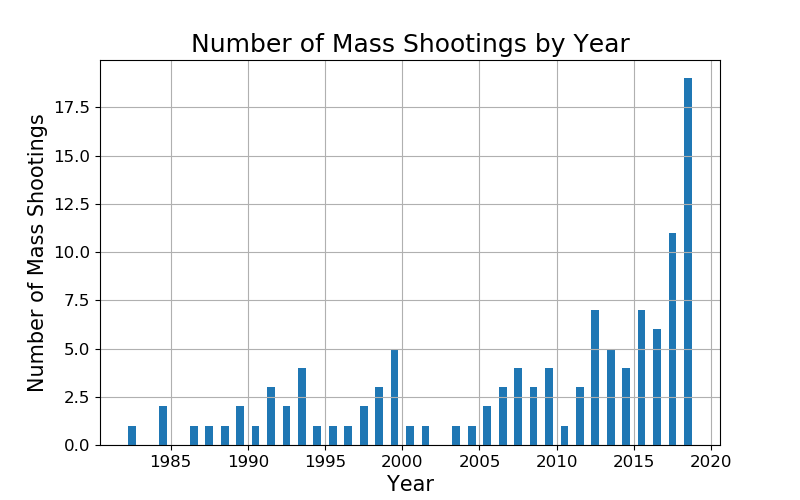

37


In [23]:
## creates a histogram of the number of shootings per year

## make the figure
fig2 = plt.figure(figsize=(8,5))
ax= fig2.add_subplot(111)

## change the type to a list so it can be used in hist function
x = massShooting['year'].tolist()  
num_years = max(massShooting['year']) - min(massShooting['year'])

# plot the data
massShooting['year'].hist(bins=num_years, xlabelsize=12, ylabelsize=12, rwidth=0.5)

#label the figure
ax.set_title('Number of Mass Shootings by Year', fontsize = 18)
ax.set_ylabel("Number of Mass Shootings", fontsize = 15)
ax.set_xlabel("Year", fontsize = 15);

plt.show()

## Figure 2: Histogram that shows the increase of mass shootings over the last ~3 decades

This graph clearly shows the dramatic increase in the instances of mass shootings, especially in the last ten years.  Each bar represents a single calender year, meaning that the blank spaces of 1983, 1985 and 2002 did not see any mass shooting incidents. From 2018 to 2019 there was an increase of 8 mass shootings in a single year, and there is still two and a half months before the end of the year! 

Next we need to understand who is carrying out these terrorist attacks and why. This can be done by breaking down the demographics of the perpetrators by gender, ethnicity and age. 

***

<IPython.core.display.Javascript object>


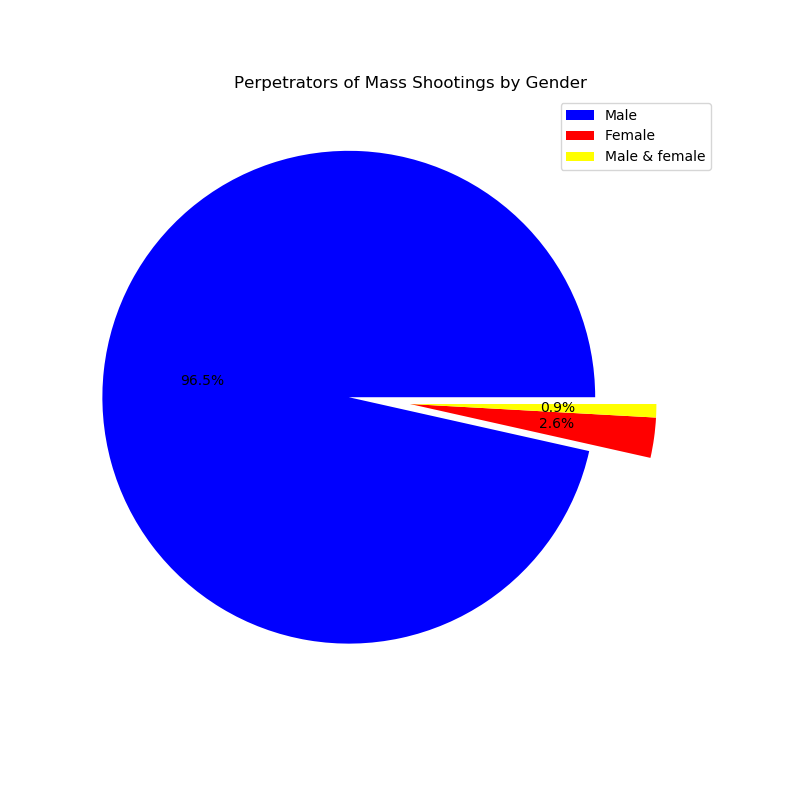

In [48]:
## create a pie plot that shows percentage of shooters by gender

# make dict that store the data and names for legend
gender_breakdown = { }

# loop over rows in dataset looking at the 'gender' column and count occurances in gender_breakdown
for x in massShooting['gender']:
    gen = x.capitalize().strip()
    if len(gen) == 1: 
        if gen == 'M': 
            gen = 'Male' 
        else: 
            gen = 'Female'   
    if gen not in gender_breakdown:
        gender_breakdown[gen] = 0
    gender_breakdown[gen] += 1    

# creating the figure
colors = ['blue', 'red', 'yellow']
fig3 = plt.figure(figsize=(8,8))
ax= fig3.add_subplot(111)

# plotting the data 
plt.pie( 
    gender_breakdown.values(),
    # with no shadows
    shadow=False,
    # with colors defined as above
    colors = colors,
    # with one slide exploded out
    explode=(0.25, 0, 0),
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# set labels on plot
ax.set_title('Perpetrators of Mass Shootings by Gender')
ax.legend(gender_breakdown.keys(),loc=1)

# View the plot
plt.show()


## Figure 3: Pie chart showing the breakdown of terrorist by gender

Figure 3 shows a pie chart of the percentage of mass shootings due to males, females and both. As you can easily see by the graph the vast majority of these attacks are executed by males. The both category is a single instance where both a male and female perpetrator carried out the attack. 

This graph highlights how the majority of mass shootings in the USA are carried out by people who identify as male. Therefore, to address the problem we need to understand what drives these men to such extremes. 

***

<IPython.core.display.Javascript object>


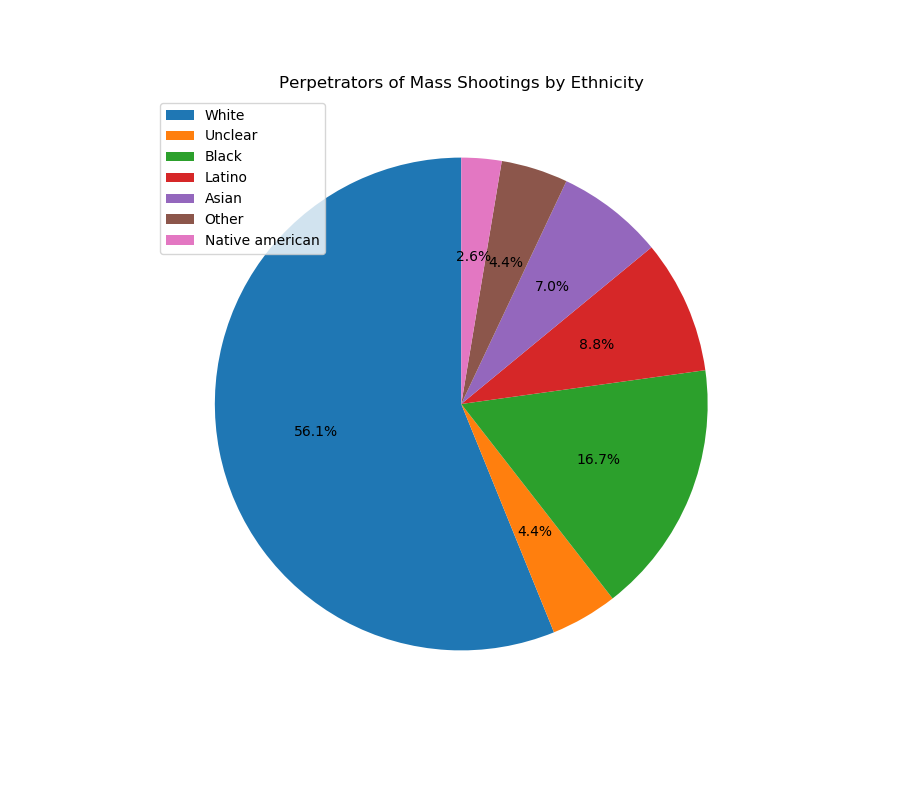

In [10]:
# creates a pie plot of the percentage of shooters based on ethnicity 
# initilizing an empty dictionary that will be filled with the data
race_dict = {}

#looping through database, grabbing the value from 'race' column and putting it in the dictionary (if it is not in)
#     and incrementing the instances of that race 
for y in massShooting['race']:
    cap_race = y.capitalize().strip() # makes the word capital for comparison
    # and strips any blank spaces
    if cap_race == '-':
        cap_race = 'Unclear'
    if cap_race not in race_dict:
        race_dict[cap_race] = 0
    race_dict[cap_race] += 1
    
# creating the figure 
fig4 = plt.figure(figsize=(9,8))
ax= fig4.add_subplot(111)

# plotting the data 
plt.pie(
    race_dict.values(),
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# set labels on plot
ax.set_title('Perpetrators of Mass Shootings by Ethnicity')
ax.legend(race_dict.keys(),loc='best')

# View the plot
plt.show()

## Figure 4: a breakdown of the percentage of shooters grouped by ethnicity

Contrary to popular belief, the majority of terrorist attacks that take place on American soil are actually carried out by a white demographic. They may have become radicalized by social isolation, a sense of entitlement or delusions of grandeur, however we will need to look at some other aspects of the data before we can determine a root cause (or causes). 

To address the majority of the issues that the USA has with mass shootings, outreach programs designed to engage white men in discussions and awareness campaigns would address the majority of mass shooting incidents. How to enact change and the age range of the programs must be appropriate. 

***

<IPython.core.display.Javascript object>


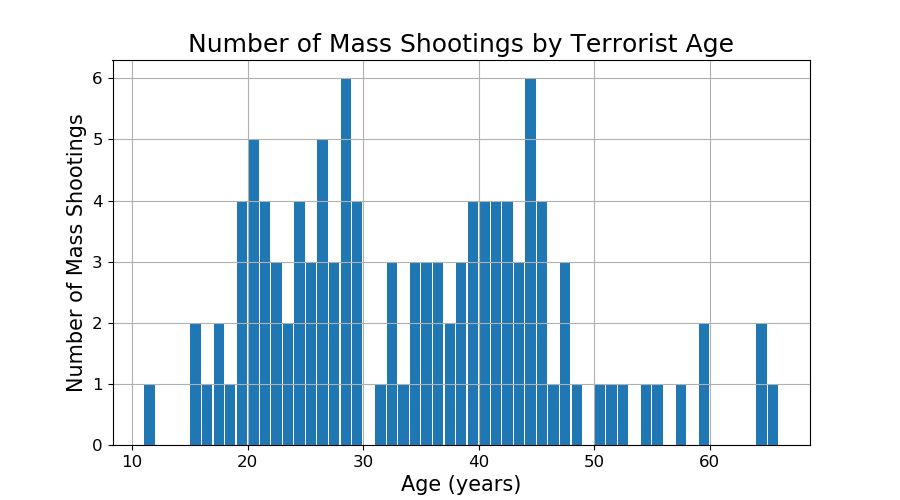

In [21]:
# plotting histogram of the shooters age 

## make the figure
fig5 = plt.figure(figsize=(9,5))
ax= fig5.add_subplot(111)

## change the type to a list so it can be used in hist function
x = massShooting['age_of_shooter'].tolist()  
num_bins = max(massShooting['age_of_shooter']) - min(massShooting['age_of_shooter'])

# plot the data
massShooting['age_of_shooter'].hist(bins=num_bins, xlabelsize=12, ylabelsize=12, rwidth=0.9)

# label the figure
ax.set_title('Number of Mass Shootings by Terrorist Age', fontsize = 18)
ax.set_ylabel("Number of Mass Shootings", fontsize = 15)
ax.set_xlabel("Age (years)", fontsize = 15);
plt.show()

## Figure 5: Attacks broken down by age of terrorist

This data is very interesting, here we see a multi-modal distribution, where I personally, expected to see some type of single distribution- possibly Gaussian in nature- but more likely a Gamma function with a short trailing tail. This suggests that there at least 2 main reasons that mass shootings are carried out. With one reason being the driving factor for people around the ages of 25 and under and the other as the driving factor for those 40 and above, with some overlap of each in the 25-40 range. 

The next step for this would be to look in the summary column of the database and see which mass shootings have data on the 'reason' for carrying out the attack and cross reference these with the age of the perpetrator to see what similarities in the reason occur in these age groups (ideally by using or creating some sort of small relational database). 

***

<IPython.core.display.Javascript object>


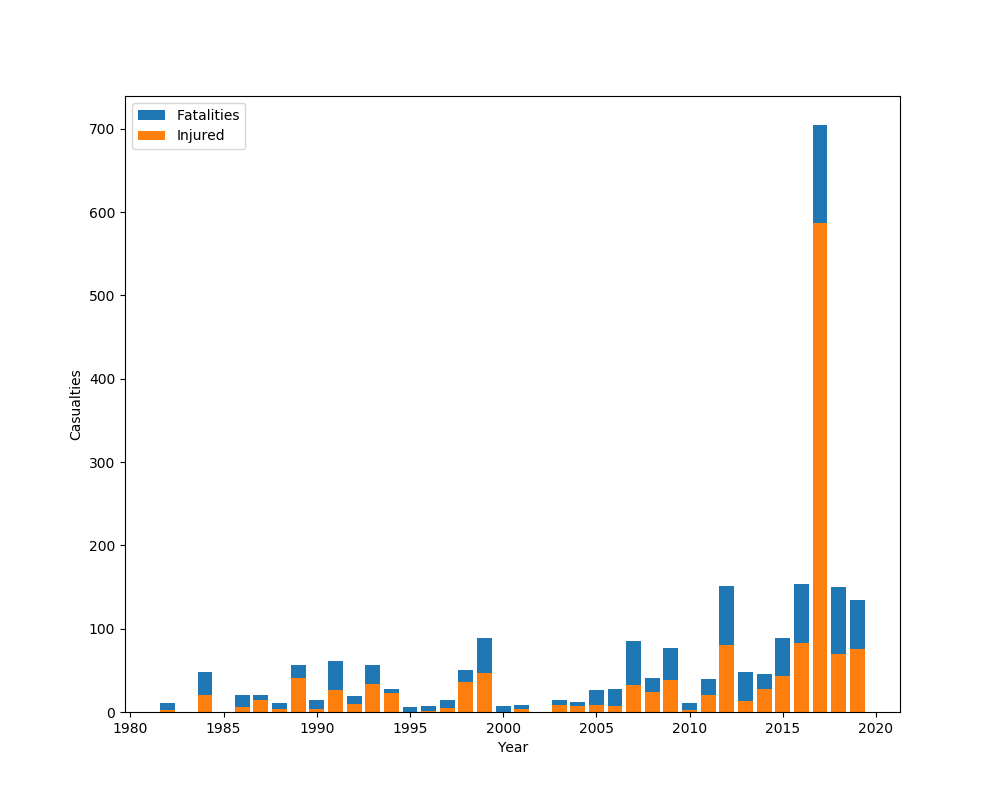

In [32]:
## plotting bar graphs of the number of fatalities and injuries on the same plot 

#setting up variables that will be use in the loop and plotting below
year = list(range(min(massShooting['year']), max(massShooting['year'])+1))
fatal, injured, total = np.zeros(len(year)), np.zeros(len(year)), np.zeros(len(year))

# looping through the database adding up the fatalities and injuries for each year
for i in range(len(year)): #loop through years 
    for j in range(len(massShooting)): #loop through rows of mass Shooting
        if massShooting.loc[j, 'year'] == year[i]: 
            fatal[i] += massShooting.loc[j,'fatalities']#'fatalities'
            injured[i] += massShooting.loc[j,'injured']#'injured'
            total[i] += massShooting.loc[j,'total_victims']#'total_victims'        

# make the figure
fig7 = plt.figure(figsize=(10,8))
ax= fig7.add_subplot(111)

# plot data stacked 
plt.bar(year, fatal, width=0.8, label='Fatalities', bottom=injured)
plt.bar(year, injured, width=0.8, label='Injured')

#plot labels of bottom plot 
plt.ylabel("Casualties")
plt.xlabel("Year")
plt.legend(loc='best')
plt.subplots_adjust(wspace=0.5)
plt.show()


## Figure 6: Number of Fatalities and Injuries per Year 

Figure 6 is split into stacked graphs that demonstrate two different ways of representing the data. The top method uses a bar graph that plots the number of deaths and number of persons injured side by side. The bottom method stacks the values, so that the number of persons injured is the base and the number of deaths is graphed as an addition on top. The upside to using the letter method for visualization, is that the corresponding number on the y-axis is the sum of the two (fatalities and injuries) for the year. 

2017 is noticeably higher in injuries than any of the other years. This is due to the Las Vegas strip massacre where the perpetrator shot into a crowd of people attending a music festival below. This year has become an outlier to the general trend seen in the other years. This is in part due to the fact that at the Las Vegas strip massacre 'bump stalks' were used. They essentially turn a semi-automatic weapon into an automatic one as it increases the rate at which the gun can fire rounds. 

In the next stage of the analysis to come, I will be working on adding some trend lines to the histogram and bar plots so that we can determine rate at which incidences of mass shootings are occurring, and make some projections for the coming years, **if** no laws or outreach programs are implemented. 

***